In [1]:
import pandas as pd
import numpy as np

data = pd.DataFrame({
    'y_true': [1,0,1,0,0,1,0,0,0,1],
    'y_pred': [0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.05]
})

# Sort by predicted risk descending
data = data.sort_values('y_pred', ascending=False)

# Cumulative population %
data['cum_pop'] = np.arange(1, len(data)+1) / len(data)

# Cumulative defaults %
total_defaults = data['y_true'].sum()
data['cum_def'] = data['y_true'].cumsum() / total_defaults

print(data[['y_true','y_pred','cum_pop','cum_def']])


   y_true  y_pred  cum_pop  cum_def
0       1    0.90      0.1     0.25
1       0    0.80      0.2     0.25
2       1    0.70      0.3     0.50
3       0    0.60      0.4     0.50
4       0    0.50      0.5     0.50
5       1    0.40      0.6     0.75
6       0    0.30      0.7     0.75
7       0    0.20      0.8     0.75
8       0    0.10      0.9     0.75
9       1    0.05      1.0     1.00


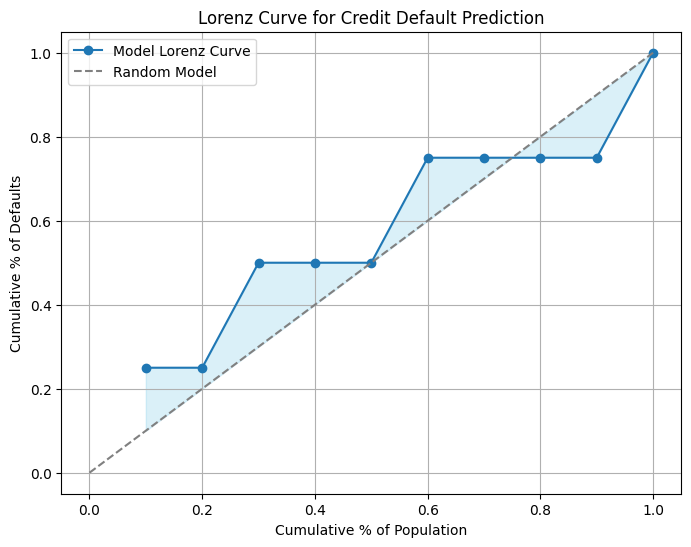

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(data['cum_pop'], data['cum_def'], marker='o', label='Model Lorenz Curve')
plt.plot([0,1],[0,1], linestyle='--', color='gray', label='Random Model')
plt.fill_between(data['cum_pop'], data['cum_def'], data['cum_pop'], color='skyblue', alpha=0.3)
plt.title('Lorenz Curve for Credit Default Prediction')
plt.xlabel('Cumulative % of Population')
plt.ylabel('Cumulative % of Defaults')
plt.legend()
plt.grid(True)
plt.show()